In [3]:
import numpy as np
import networkx as nx
import time
import random
import matplotlib.pyplot as plt

# Code with Numpy (check! why is slow?)

In [78]:
def new_network_nump(size, opinions,k):
    '''
    Create a cycle network of size and options determined with an aleatory state of opinion and with k neighbors
    '''
    list1 = np.random.randint(0,opinions,size = size)
    

    return list1

def interaction_nump(list1, tolerance, intensity, propaganda,k):
    '''
    Simulate the interaction between mass media or agents
    '''
    list2 = np.zeros(len(list1) + 2*k)
    
    
    list2[k:-k]= list1
    
    list2[:k] = list1[-k:]
    list2[-k:] = list1[:k]
    

    list3 = np.zeros(len(list1))
    for i in range(k,len(list2) - k):
        list3[i-k] = np.random.choice(list2[i-k: i+k])

    # Create an array with parameters intensity and tolerance
    intensity_array = intensity*np.ones(len(list1))
    tolerance_array = tolerance*np.ones(len(list1))
    random_r = np.random.random(size =len(list1))

    # Acts like an if but for an array to work in all elements at the same time 
    # Defines if interaction is with mass media or agents
    
    inter_mass = np.where(random_r < intensity_array , 1,np.zeros(len(list1)))

    # Interaction with mass media
    distance = np.abs(list1 - propaganda)
    conditions = np.logical_and(inter_mass == 1 , distance < tolerance_array)
    list4 = np.where(conditions, propaganda, list1)

    # Interaction with agents
    distance = np.abs(list1 - list3)
    conditions = np.logical_and(inter_mass == 0 , distance < tolerance_array)
    list4 = np.where(conditions, list3, list1)
    return list4


def inter_simul_nump(time, tolerance, intensity, propaganda, k):
    '''
    Iterates simulation time times
    '''
    a = new_network_nump(size, options, k)
    T = 0
    while T < time:
        a = interaction_nump(a, tolerance, intensity, propaganda,k)
        T += 1

    return a
    
    

In [94]:
tini = time.time()
size = 1000
options = 100
k = 20
a1 = inter_simul_nump(1000,3,0.4,23,k)
tend = time.time()
print(tend - tini)

tini = time.time()
size = 1000
options = 100
a1 = inter_simul(10000,3,0.4,23,k)
tend = time.time()
print(tend - tini)

10.983128309249878
15.698381900787354


# Code with NetworkX

In [95]:
def new_network(size, options, k):
    '''
    Create a cycle network of size and options determined with an aleatory state of opinion and with k neighbors
    '''
    # Create an empty adjacency matrix
    adjacency_matrix = np.zeros((size, size), dtype=int)

    # Connect each agent to its k neighbors on each side
    for i in range(size):
        for j in range(1, k+1):
            adjacency_matrix[i, (i - j) % size] = 1  # Connect to the left neighbor
            adjacency_matrix[i, (i + j) % size] = 1  # Connect to the right neighbor

    # Create a graph from the adjacency matrix
    G = nx.from_numpy_array(adjacency_matrix)

    opinions = np.random.randint(0, options, size=size)

    node_attributes = {node: opinion for node, opinion in zip(G.nodes, opinions)}

    # Set the attributes to the graph nodes
    nx.set_node_attributes(G, node_attributes, 'opinion')

    return G

def interaction(graph, tolerance, intensity, propaganda):
    '''
    Simulate the interaction between mass media or agents
    '''
    for node in graph.nodes():
        if random.random() < intensity:
            if abs(graph.nodes[node]['opinion'] - propaganda) < tolerance:
                graph.nodes[node]['opinion'] = propaganda
        else:
            neighbors = list(graph.neighbors(node))
            neighbor = random.choice(neighbors)
            if abs(graph.nodes[node]['opinion'] - graph.nodes[neighbor]['opinion']) < tolerance:
                graph.nodes[node]['opinion'] = graph.nodes[neighbor]['opinion']

    return graph

def inter_simul(time, tolerance, intensity, propaganda, k):
    '''
    Iterates simulation time times
    '''
    a = new_network(size, options, k)
    T = 0
    while T < time:
        a = interaction(a, tolerance, intensity, propaganda)
        T += 1

    return a


In [99]:
tini = time.time()
size = 500
options = 100
a=new_network(size,options,20)
a1 = inter_simul(300000,3,.4,23,5)
tend = time.time()
print(tend - tini)

167.09616589546204


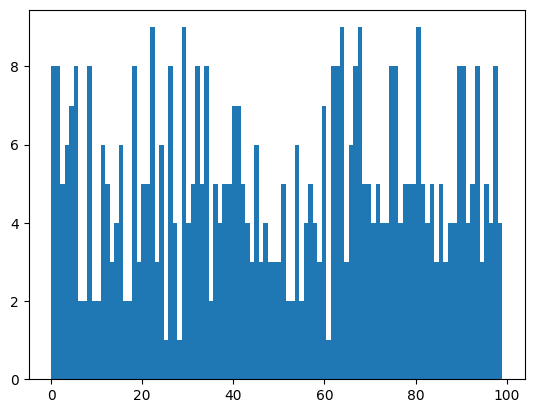

In [100]:
plt.hist(list(nx.get_node_attributes(a,'opinion').values()),bins = 100)
plt.show()


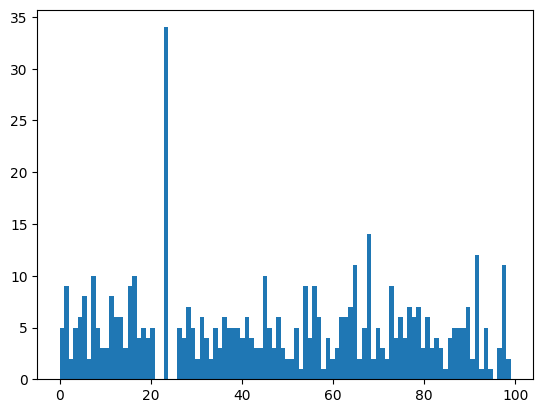

In [101]:
plt.hist(list(nx.get_node_attributes(a1,'opinion').values()),bins = 100)
plt.show()